In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
import subprocess
import uuid

from utils import *
import itertools

In [2]:
A = 1
N = 20

f = np.linspace(1, 100, N)
phi = np.linspace(0, 2*np.pi,1)
sigma = np.linspace(0,A,1)

source = {}
i = 0
for j, k, l in itertools.product(f, phi, sigma):
    i+=1
    source[f'S{i-1}'] = {'name':f's{i-1}.txt','frequency':j, 'phase':k, 'noise':l}

In [3]:
#print(source)
signals = list(source.keys())

for i in range(len(signals)):
    generate_source(outputFile=source[f'S{i}']['name'],sigma=source[f'S{i}']['noise'],
                             delta_T=1/(32*source[f'S{i}']['frequency']),f=source[f'S{i}']['frequency'],
                             phi=source[f'S{i}']['phase'],N=N,  A=A, r=0)

In [4]:
data_dir = "../code/data_lab2"

def get_mismatch(datafile,freq=None,N_df=300, 
                f_min=0.5,f_max=100.5,mod=1):
    # Make a frequency space from 0.01 to f_max with N_df steps
    # This time try to minimise the number of templates in the bank
    # such that you still get good detection
    freqs = np.linspace(f_min, f_max, N_df) 
    tbank = f"tbank_{datafile.split('.txt')[0]}_ndf{N_df}.txt" 
    
    # Generate template bank with this frequency space
    with open(os.path.join(data_dir,tbank) ,'w') as tbfile:
        for f in freqs:
            tbfile.write("{0} {1}\n".format(f,0))

    results_file = prober(datafile,outputFile=f'prob_fmin({f_min})_fmax({f_max}).txt', templateFile=tbank, mod=mod)
    results = np.loadtxt(results_file)
    # Plot best match
    if mod == 1 :
        # For S_1 get the maximum
        best_phi, best_f, best_val = results[np.argmax(results[:,2])]
        tv_phi, tv_f, tv_val = prober(datafile, f=freq, mod=mod)
        tv_val = tv_val.split('\n')[0]
        M_i = 1 - float(best_val)/float(tv_val)        

    return M_i

33.0


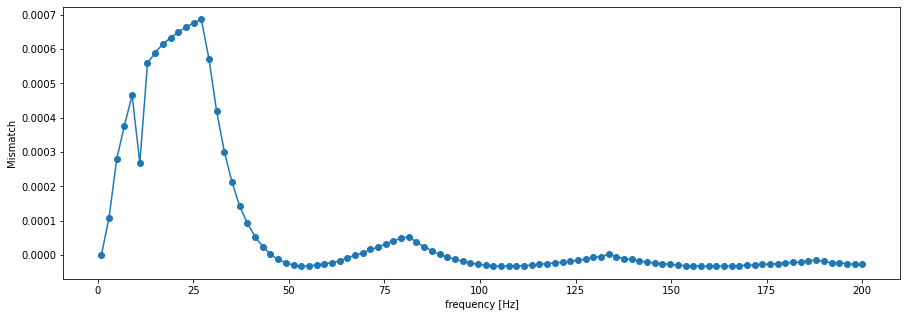

In [5]:
f = np.linspace(1, 200, 100)
print(source['S32']['frequency'])
mismatches = []
for i in signals:
    mismatches.append(get_mismatch(source[i]['name'], freq=source[i]['frequency'], mod=1, N_df=2000, f_min=f[0], f_max=f[-1]))

plt.figure(figsize=(15,5))
plt.xlabel('frequency [Hz]')
plt.ylabel('Mismatch')
plt.plot(f, mismatches, '-o')

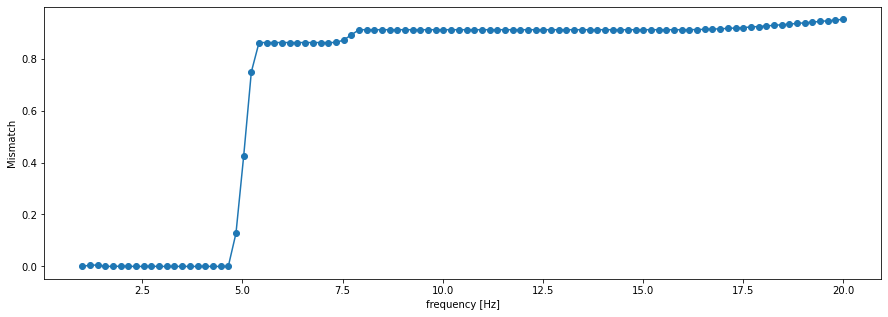

In [6]:
f = np.linspace(1, 20, 100)

mismatches = []
for i in signals:
    mismatches.append(get_mismatch(source[i]['name'], freq=source[i]['frequency'], mod=1, N_df=300, f_min=f[0], f_max=f[-1]))

plt.figure(figsize=(15,5))
plt.xlabel('frequency [Hz]')
plt.ylabel('Mismatch')
plt.plot(f, mismatches, '-o')

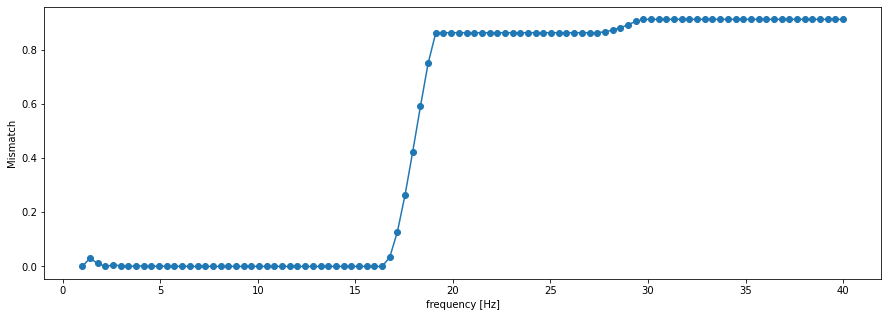

In [7]:
f = np.linspace(1, 40, 100)

mismatches = []
for i in signals:
    mismatches.append(get_mismatch(source[i]['name'], freq=source[i]['frequency'], mod=1, N_df=300, f_min=f[0], f_max=f[-1]))

plt.figure(figsize=(15,5))
plt.xlabel('frequency [Hz]')
plt.ylabel('Mismatch')
plt.plot(f, mismatches, '-o')

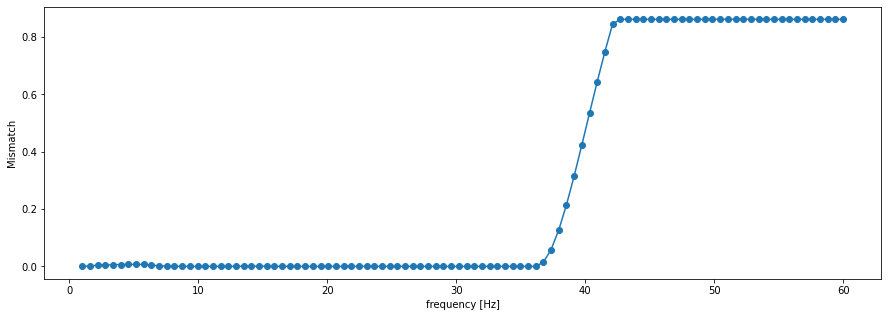

In [8]:
f = np.linspace(1, 60, 100)

mismatches = []
for i in signals:
    mismatches.append(get_mismatch(source[i]['name'], freq=source[i]['frequency'], mod=1, N_df=300, f_min=f[0], f_max=f[-1]))

plt.figure(figsize=(15,5))
plt.xlabel('frequency [Hz]')
plt.ylabel('Mismatch')
plt.plot(f, mismatches, '-o')

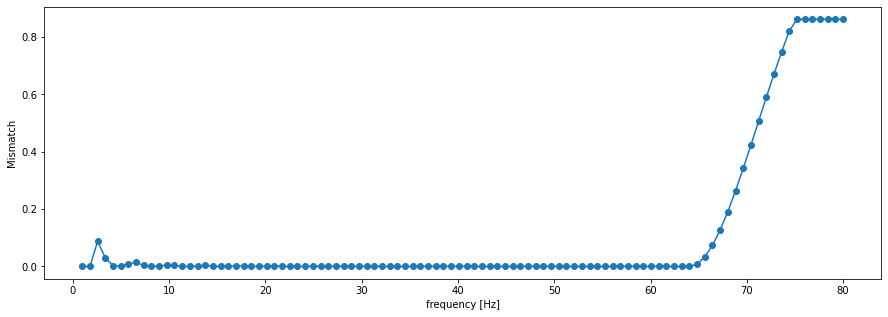

In [9]:
f = np.linspace(1, 80, 100)

mismatches = []
for i in signals:
    mismatches.append(get_mismatch(source[i]['name'], freq=source[i]['frequency'], mod=1, N_df=300, f_min=f[0], f_max=f[-1]))

plt.figure(figsize=(15,5))
plt.xlabel('frequency [Hz]')
plt.ylabel('Mismatch')
plt.plot(f, mismatches, '-o')

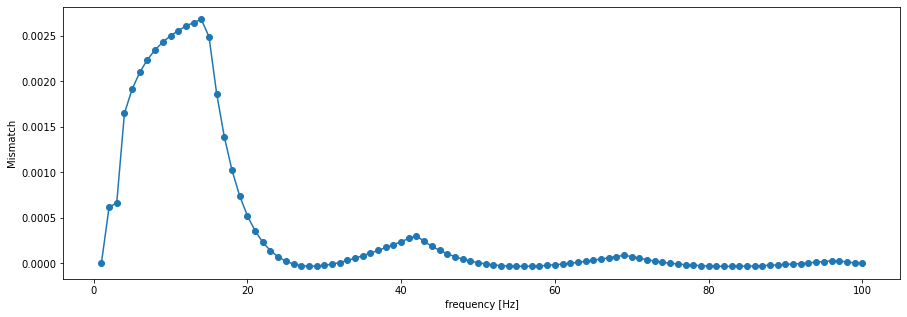

In [10]:
f = np.linspace(1, 100, 100)

mismatches = []
for i in signals:
    mismatches.append(get_mismatch(source[i]['name'], freq=source[i]['frequency'], mod=1, N_df=500, f_min=f[0], f_max=f[-1]))

plt.figure(figsize=(15,5))
plt.xlabel('frequency [Hz]')
plt.ylabel('Mismatch')
plt.plot(f, mismatches, '-o')

Method 1


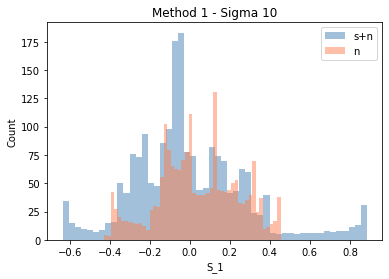

In [23]:
#number of trials for each s+n and pure noise:
sigma = 10
freq = 10
phase = 0
mod=1
n_dist = 2000
temp_bank = "histogram_test_tb.tb"
with open(os.path.join(data_dir, temp_bank),'w') as tbfile:
    for f in np.linspace(5, 15, 2000):
        tbfile.write("{0} {1}\n".format(f,phase))
print(f"Method {mod}")

prober_results_test = {'signal':np.zeros(n_dist), 'noise':np.zeros(n_dist)}
amp_dict = {'signal':1., 'noise':0.}

infile = generate_source(outputFile=f'N-source_({temp_bank}).txt',sigma=sigma, N=1000)
resultf = prober(infile,outputFile=f'N-prob_({temp_bank}).txt', templateFile=temp_bank, mod=mod)
results = np.loadtxt(resultf)
prober_results_test['noise'] = results[:,2]

infile = generate_source(f'S-source_({temp_bank}).txt',A=1, sigma=sigma,f=freq, N=1000)
resultf = prober(infile,outputFile=f'S-prob_({temp_bank}).txt', templateFile=temp_bank, mod=mod)
results = np.loadtxt(resultf)
prober_results_test['signal'] = results[:,2]

plt.hist(prober_results_test['signal'], 50, facecolor='steelblue', alpha =0.5,label="s+n")
plt.hist(prober_results_test['noise'], 50, facecolor='coral', alpha=0.5, label="n")
plt.xlabel("S_{}".format(1))
plt.ylabel("Count")
plt.legend()
plt.title("Method 1 - Sigma %g" % sigma)
plt.show()
plt.close()



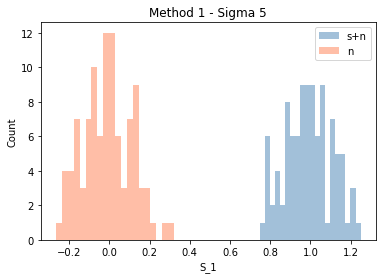

In [107]:


#number of trials for each s+n and pure noise:
n_dist = 100
sigma = 5
freq = 10
phase = 0
mod=1

bins = 20

prober_results_sigma5 = {'signal':np.zeros(n_dist), 'noise':np.zeros(n_dist)}

for i in range(n_dist):
    infile = generate_source(outputFile=f'N-source_({freq},{phase}){i}.txt',sigma=sigma, N=1000)
    resultf = prober(infile, outputFile=f'N-prob_({freq},{phase}){i}.txt', f=freq, phi=phase, mod=mod)
    results = np.loadtxt(resultf)
    prober_results_sigma5['noise'][i] = results[2]

    infile = generate_source(outputFile=f'S-source_({freq},{phase}){i}.txt',A=2, sigma=sigma,f=freq, N=1000)
    resultf = prober(infile, outputFile=f'S-source_({freq},{phase}){i}.txt', f=freq, phi=phase, mod=mod)
    results = np.loadtxt(resultf)
    prober_results_sigma5['signal'][i] = results[2]

plt.hist(prober_results_sigma5['signal'], bins, facecolor='steelblue', alpha =0.5,label="s+n")
plt.hist(prober_results_sigma5['noise'], bins, facecolor='coral', alpha=0.5, label="n")
plt.xlabel("S_{}".format(1))
plt.ylabel("Count")
plt.legend()
plt.title("Method 1 - Sigma %g" % sigma)
plt.show()
plt.close()



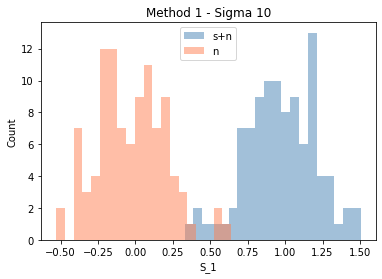

In [108]:
#number of trials for each s+n and pure noise:
n_dist = 100
sigma = 10
freq = 10
phase = 0
mod=1

prober_results_sigma10 = {'signal':np.zeros(n_dist), 'noise':np.zeros(n_dist)}

for i in range(n_dist):
    infile = generate_source(outputFile=f'N-source_({freq},{phase}){i}.txt',sigma=sigma, N=1000)
    resultf = prober(infile, outputFile=f'N-prob_({freq},{phase}){i}.txt', f=freq, phi=phase, mod=mod)
    results = np.loadtxt(resultf)
    prober_results_sigma10['noise'][i] = results[2]

    infile = generate_source(outputFile=f'S-source_({freq},{phase}){i}.txt',A=2, sigma=sigma,f=freq, N=1000)
    resultf = prober(infile, outputFile=f'S-source_({freq},{phase}){i}.txt', f=freq, phi=phase, mod=mod)
    results = np.loadtxt(resultf)
    prober_results_sigma10['signal'][i] = results[2]

plt.hist(prober_results_sigma10['signal'], bins, facecolor='steelblue', alpha =0.5,label="s+n")
plt.hist(prober_results_sigma10['noise'], bins, facecolor='coral', alpha=0.5, label="n")
plt.xlabel("S_{}".format(1))
plt.ylabel("Count")
plt.legend()
plt.title("Method 1 - Sigma %g" % sigma)
plt.show()
plt.close()






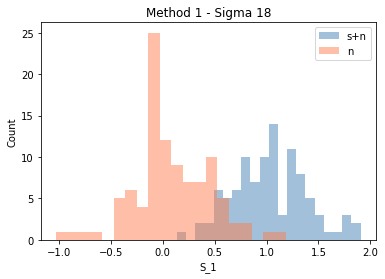

In [109]:
#number of trials for each s+n and pure noise:
n_dist = 100
sigma = 18
freq = 10
phase = 0
mod=1

prober_results_sigma18 = {'signal':np.zeros(n_dist), 'noise':np.zeros(n_dist)}

for i in range(n_dist):
    infile = generate_source(outputFile=f'N-source_({freq},{phase}){i}.txt',sigma=sigma, N=1000)
    resultf = prober(infile, outputFile=f'N-prob_({freq},{phase}){i}.txt', f=freq, phi=phase, mod=mod)
    results = np.loadtxt(resultf)
    prober_results_sigma18['noise'][i] = results[2]

    infile = generate_source(outputFile=f'S-source_({freq},{phase}){i}.txt',A=2, sigma=sigma,f=freq, N=1000)
    resultf = prober(infile, outputFile=f'S-source_({freq},{phase}){i}.txt', f=freq, phi=phase, mod=mod)
    results = np.loadtxt(resultf)
    prober_results_sigma18['signal'][i] = results[2]

plt.hist(prober_results_sigma18['signal'], bins, facecolor='steelblue', alpha =0.5,label="s+n")
plt.hist(prober_results_sigma18['noise'], bins, facecolor='coral', alpha=0.5, label="n")
plt.xlabel("S_{}".format(1))
plt.ylabel("Count")
plt.legend()
plt.title("Method 1 - Sigma %g" % sigma)
plt.show()
plt.close()

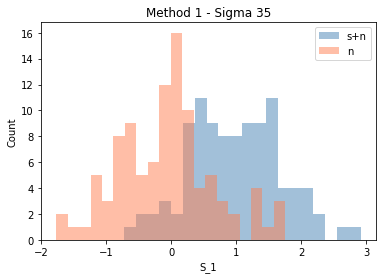

In [110]:
#number of trials for each s+n and pure noise:
n_dist = 100
sigma = 35
freq = 10
phase = 0
mod=1

prober_results_sigma35 = {'signal':np.zeros(n_dist), 'noise':np.zeros(n_dist)}

for i in range(n_dist):
    infile = generate_source(outputFile=f'N-source_({freq},{phase}){i}.txt',sigma=sigma, N=1000)
    resultf = prober(infile, outputFile=f'N-prob_({freq},{phase}){i}.txt', f=freq, phi=phase, mod=mod)
    results = np.loadtxt(resultf)
    prober_results_sigma35['noise'][i] = results[2]

    infile = generate_source(outputFile=f'S-source_({freq},{phase}){i}.txt',A=2, sigma=sigma,f=freq, N=1000)
    resultf = prober(infile, outputFile=f'S-source_({freq},{phase}){i}.txt', f=freq, phi=phase, mod=mod)
    results = np.loadtxt(resultf)
    prober_results_sigma35['signal'][i] = results[2]

plt.hist(prober_results_sigma35['signal'], bins, facecolor='steelblue', alpha =0.5,label="s+n")
plt.hist(prober_results_sigma35['noise'], bins, facecolor='coral', alpha=0.5, label="n")
plt.xlabel("S_{}".format(1))
plt.ylabel("Count")
plt.legend()
plt.title("Method 1 - Sigma %g" % sigma)
plt.show()
plt.close()

In [137]:
thresh = np.linspace(-1,1, 100)
FPs5,TPs5 = [], []
FPs18,TPs18 = [], []
FPs35,TPs35 = [], []

FPs35 = []
for i in thresh:
    TPs5.append(len(np.where(prober_results_sigma5['signal'] >= i)[0])/len(prober_results_sigma5['signal']))
    TPs18.append(len(np.where(prober_results_sigma18['signal'] >= i)[0])/len(prober_results_sigma18['signal']))
    TPs35.append(len(np.where(prober_results_sigma35['signal'] >= i)[0])/len(prober_results_sigma35['signal']))
    
    FPs5.append(len(np.where(prober_results_sigma5['noise'] >= i)[0])/len(prober_results_sigma5['noise']))
    FPs18.append(len(np.where(prober_results_sigma18['noise'] >= i)[0])/len(prober_results_sigma18['noise']))
    FPs35.append(len(np.where(prober_results_sigma35['noise'] >= i)[0])/len(prober_results_sigma35['noise']))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)


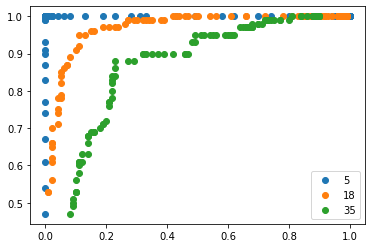

In [140]:
#print(FPs35, TPs35)
print(np.where(prober_results_sigma5['signal']))
plt.scatter(FPs5, TPs5, label='5')
plt.scatter(FPs18, TPs18, label='18')
plt.scatter(FPs35, TPs35, label='35')
plt.legend()